In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import numpy as np
import time
from sklearn.metrics import average_precision_score

# Load your datasets
data_dir = r"C:\Users\User\Desktop\presentation\OutcomeDataset"
train_dir = f"{data_dir}/train"
val_dir = f"{data_dir}/val"
test_dir = f"{data_dir}/test"

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)


Found 6852 images belonging to 3 classes.
Found 855 images belonging to 3 classes.
Found 860 images belonging to 3 classes.


In [7]:
# Define and compile the ResNet50 model
def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

resnet50_model = create_resnet50_model()

# Train ResNet50
print("Training ResNet50...")
start_time = time.time()
history_resnet50 = resnet50_model.fit(train_generator, validation_data=val_generator, epochs=50)
training_time_resnet50 = time.time() - start_time
print(f"Training time for ResNet50: {training_time_resnet50} seconds")

# Evaluate ResNet50
test_loss_resnet50, test_accuracy_resnet50 = resnet50_model.evaluate(test_generator)
print(f"Test accuracy for ResNet50: {test_accuracy_resnet50}")

# Predict and calculate mAP for ResNet50
y_true = test_generator.classes
y_pred_proba_resnet50 = resnet50_model.predict(test_generator)
y_pred_resnet50 = np.argmax(y_pred_proba_resnet50, axis=1)
mAP_resnet50 = average_precision_score(y_true, y_pred_proba_resnet50, average='macro')
print(f"mAP for ResNet50: {mAP_resnet50}")

# Optionally, save the model
# resnet50_model.save("ResNet50_model.h5")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 48s 1us/step
Training ResNet50...
Epoch 1/50


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 1093s 5s/step - accuracy: 0.5453 - loss: 1.0987 - val_accuracy: 0.3123 - val_loss: 1.6733
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1066s 5s/step - accuracy: 0.6316 - loss: 0.8053 - val_accuracy: 0.3357 - val_loss: 1.1526
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1009s 5s/step - accuracy: 0.6543 - loss: 0.7409 - val_accuracy: 0.4374 - val_loss: 1.0524
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 920s 4s/step - accuracy: 0.6694 - loss: 0.7051 - val_accuracy: 0.4713 - val_loss: 1.0363
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 918s 4s/step - accuracy: 0.6774 - loss: 0.6943 - val_accuracy: 0.6035 - val_loss: 0.8328
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 916s 4s/step - accuracy: 0.6794 - loss: 0.6842 - val_accuracy: 0.5930 - val_loss: 0.9004
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 919s 4s/step - accuracy: 0.6754 - loss: 0.6738 - val_accuracy: 0.6257 - val_loss: 0.8000
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 919s 4s/step - accuracy: 0.6815 - loss: 0.6626 - val_accuracy: 0.

27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 852ms/step - accuracy: 0.6355 - loss: 0.9353
Test accuracy for ResNet50: 0.6372092962265015
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 913ms/step
mAP for ResNet50: 0.6855486257901586


In [8]:
# Define and compile the DenseNet121 model
def create_densenet121_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

densenet121_model = create_densenet121_model()

# Train DenseNet121
print("Training DenseNet121...")
start_time = time.time()
history_densenet121 = densenet121_model.fit(train_generator, validation_data=val_generator, epochs=50)
training_time_densenet121 = time.time() - start_time
print(f"Training time for DenseNet121: {training_time_densenet121} seconds")

# Evaluate DenseNet121
test_loss_densenet121, test_accuracy_densenet121 = densenet121_model.evaluate(test_generator)
print(f"Test accuracy for DenseNet121: {test_accuracy_densenet121}")

# Predict and calculate mAP for DenseNet121
y_true = test_generator.classes
y_pred_proba_densenet121 = densenet121_model.predict(test_generator)
y_pred_densenet121 = np.argmax(y_pred_proba_densenet121, axis=1)
mAP_densenet121 = average_precision_score(y_true, y_pred_proba_densenet121, average='macro')
print(f"mAP for DenseNet121: {mAP_densenet121}")

# Optionally, save the model
# densenet121_model.save("DenseNet121_model.h5")


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 33s 1us/step
Training DenseNet121...
Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1114s 5s/step - accuracy: 0.5415 - loss: 0.9984 - val_accuracy: 0.6023 - val_loss: 0.9245
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1060s 5s/step - accuracy: 0.6320 - loss: 0.7937 - val_accuracy: 0.5871 - val_loss: 0.8394
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1056s 5s/step - accuracy: 0.6613 - loss: 0.7581 - val_accuracy: 0.6082 - val_loss: 0.8314
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1057s 5s/step - accuracy: 0.6548 - loss: 0.7294 - val_accuracy: 0.6140 - val_loss: 0.8213
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1065s 5s/step - accuracy: 0.6714 - loss: 0.7094 - val_accuracy: 0.6000 - val_loss: 0.8146
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1062s 5s/step - accuracy: 0.6651 - loss: 0.6938 - val_accuracy: 0.6398 - val_loss: 0.8060
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1060s 5s/step - accuracy: 0.6793 - loss: 0.6861 - val_accuracy: 0.6304 - val_loss: 0.8441
Epoch 8/50
215

215/215 ━━━━━━━━━━━━━━━━━━━━ 1068s 5s/step - accuracy: 0.6978 - loss: 0.6103 - val_accuracy: 0.6339 - val_loss: 0.9811
Epoch 50/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1068s 5s/step - accuracy: 0.6861 - loss: 0.6241 - val_accuracy: 0.6257 - val_loss: 1.0103
Training time for DenseNet121: 53284.41324257851 seconds
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6286 - loss: 0.9870
Test accuracy for DenseNet121: 0.6116279363632202
27/27 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step
mAP for DenseNet121: 0.6769185073066771


In [9]:
# Define and compile the MobileNetV3Small model
def create_mobilenetv3_model():
    base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mobilenetv3_model = create_mobilenetv3_model()

# Train MobileNetV3
print("Training MobileNetV3...")
start_time = time.time()
history_mobilenetv3 = mobilenetv3_model.fit(train_generator, validation_data=val_generator, epochs=50)
training_time_mobilenetv3 = time.time() - start_time
print(f"Training time for MobileNetV3: {training_time_mobilenetv3} seconds")

# Evaluate MobileNetV3
test_loss_mobilenetv3, test_accuracy_mobilenetv3 = mobilenetv3_model.evaluate(test_generator)
print(f"Test accuracy for MobileNetV3: {test_accuracy_mobilenetv3}")

# Predict and calculate mAP for MobileNetV3
y_true = test_generator.classes
y_pred_proba_mobilenetv3 = mobilenetv3_model.predict(test_generator)
y_pred_mobilenetv3 = np.argmax(y_pred_proba_mobilenetv3, axis=1)
mAP_mobilenetv3 = average_precision_score(y_true, y_pred_proba_mobilenetv3, average='macro')
print(f"mAP for MobileNetV3: {mAP_mobilenetv3}")

# Optionally, save the model
# mobilenetv3_model.save("MobileNetV3_model.h5")


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training MobileNetV3...
Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 117s 459ms/step - accuracy: 0.4830 - loss: 1.0565 - val_accuracy: 0.3333 - val_loss: 1.1096
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 97s 446ms/step - accuracy: 0.6176 - loss: 0.8107 - val_accuracy: 0.3333 - val_loss: 1.1469
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 97s 449ms/step - accuracy: 0.6456 - loss: 0.7578 - val_accuracy: 0.3333 - val_loss: 1.1675
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 96s 445ms/step - accuracy: 0.6475 - loss: 0.7367 - val_accuracy: 0.3333 - val_loss: 1.2028
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 96s 444ms/step - accuracy: 0.6677 - loss: 0.7067 - val_accuracy: 0.3205 - val_loss: 1.1789
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 96s 445ms/step - accuracy: 0.6629 - loss: 0.7053 - val_accuracy: 0.3415 - val_loss: 1.1824
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 96s 444ms/step - accuracy: 0.6737 - loss: 0.6837 - val_accuracy: 0.3801 - val_loss: 1.1816
Epoch 8/5

Epoch 49/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 97s 446ms/step - accuracy: 0.7059 - loss: 0.6088 - val_accuracy: 0.6070 - val_loss: 0.8894
Epoch 50/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 97s 448ms/step - accuracy: 0.6952 - loss: 0.6165 - val_accuracy: 0.5532 - val_loss: 1.1242
Training time for MobileNetV3: 4832.678914785385 seconds
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.5365 - loss: 1.0867
Test accuracy for MobileNetV3: 0.5290697813034058
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step
mAP for MobileNetV3: 0.5933556143279222


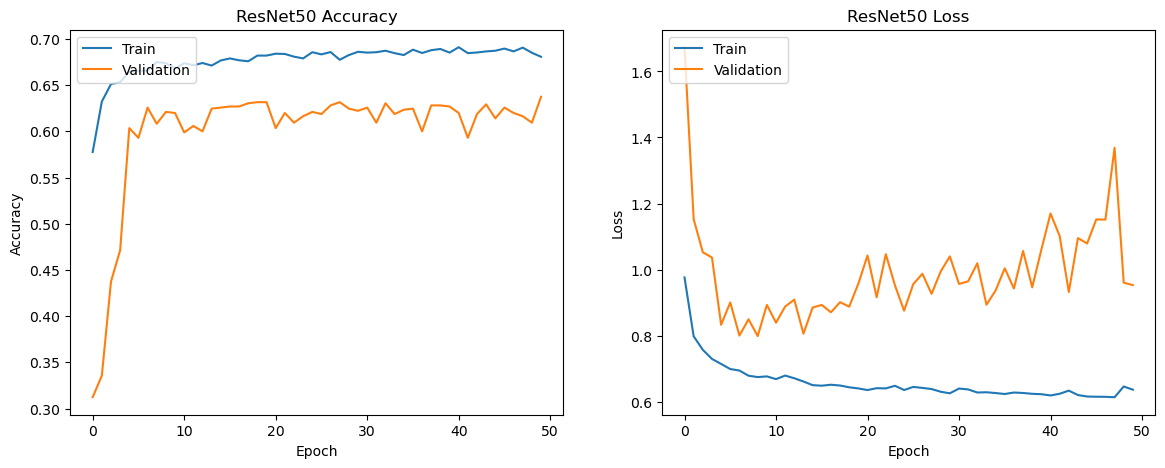

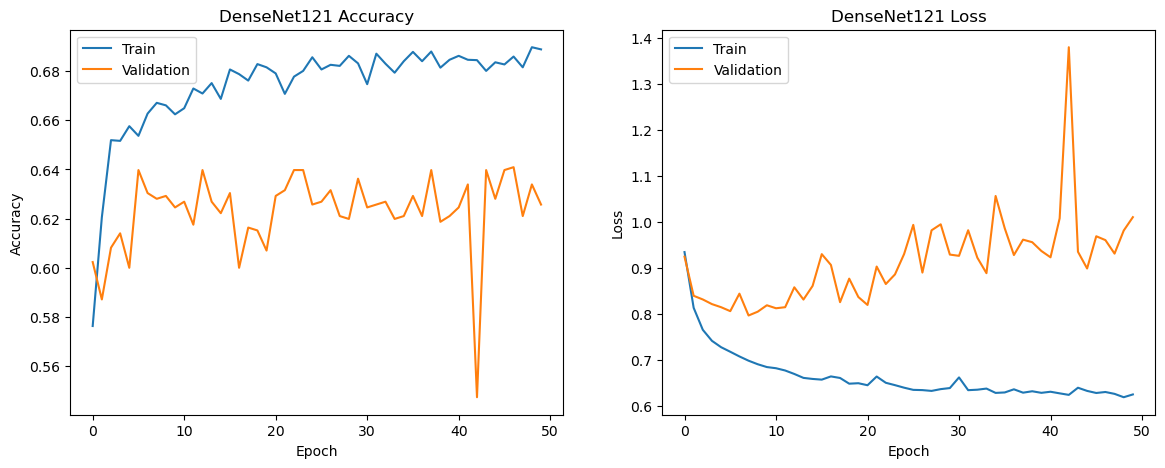

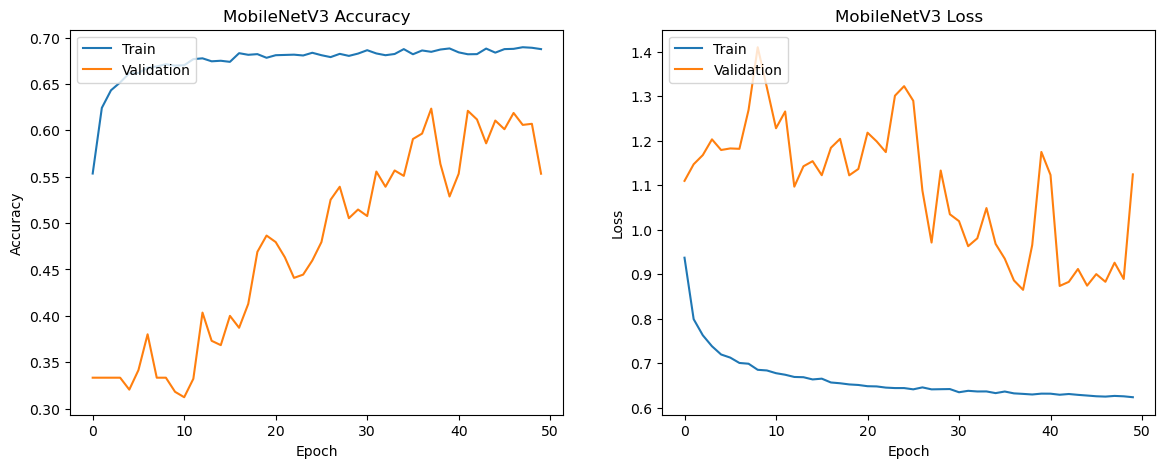

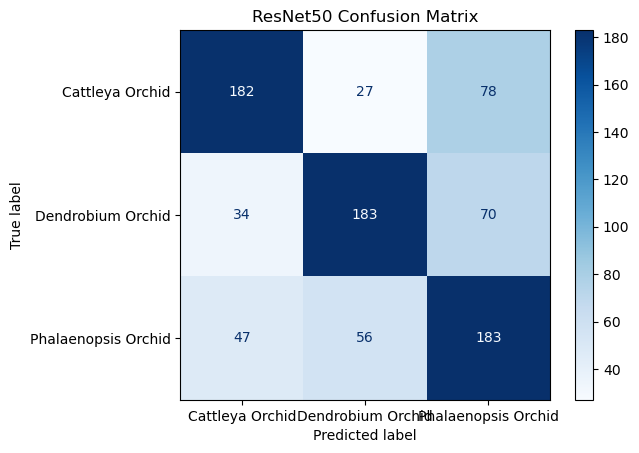

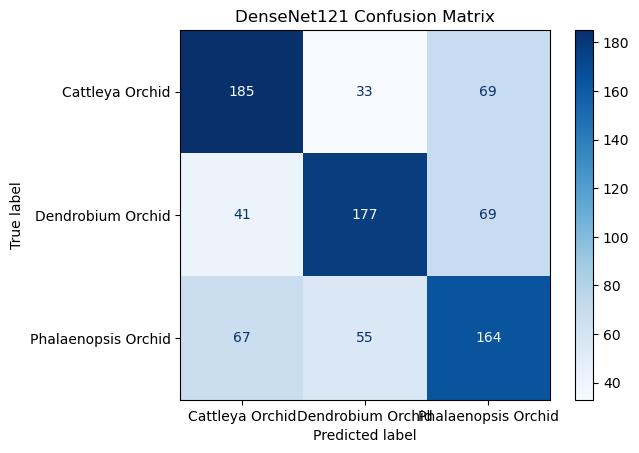

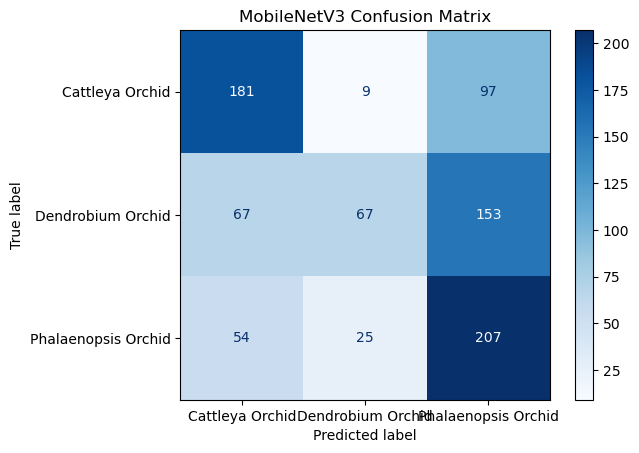

Best Model: ResNet50
Test Accuracy: 0.6372092962265015
mAP: 0.6855486257901586
Training Time: 46706.82580661774 seconds

Model Performance Summary:
ResNet50 -> Test Accuracy: 0.6372092962265015, mAP: 0.6855486257901586, Training Time: 46706.82580661774 seconds
DenseNet121 -> Test Accuracy: 0.6116279363632202, mAP: 0.6769185073066771, Training Time: 53284.41324257851 seconds
MobileNetV3 -> Test Accuracy: 0.5290697813034058, mAP: 0.5933556143279222, Training Time: 4832.678914785385 seconds


In [10]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plotting the graphs for model loss and accuracy
def plot_training_history(history, model_name):
    plt.figure(figsize=(14, 5))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Plot for ResNet50
plot_training_history(history_resnet50, "ResNet50")

# Plot for DenseNet121
plot_training_history(history_densenet121, "DenseNet121")

# Plot for MobileNetV3
plot_training_history(history_mobilenetv3, "MobileNetV3")

# Display the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Confusion matrix for ResNet50
plot_confusion_matrix(y_true, y_pred_resnet50, "ResNet50")

# Confusion matrix for DenseNet121
plot_confusion_matrix(y_true, y_pred_densenet121, "DenseNet121")

# Confusion matrix for MobileNetV3
plot_confusion_matrix(y_true, y_pred_mobilenetv3, "MobileNetV3")

# Evaluate the performance and draw conclusions
models = [
    ("ResNet50", test_accuracy_resnet50, mAP_resnet50, training_time_resnet50),
    ("DenseNet121", test_accuracy_densenet121, mAP_densenet121, training_time_densenet121),
    ("MobileNetV3", test_accuracy_mobilenetv3, mAP_mobilenetv3, training_time_mobilenetv3)
]

best_model = max(models, key=lambda item: item[1])

print(f"Best Model: {best_model[0]}")
print(f"Test Accuracy: {best_model[1]}")
print(f"mAP: {best_model[2]}")
print(f"Training Time: {best_model[3]} seconds")

print("\nModel Performance Summary:")
for model in models:
    print(f"{model[0]} -> Test Accuracy: {model[1]}, mAP: {model[2]}, Training Time: {model[3]} seconds")
